<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-ai-journey/blob/main/Lecture_06_customer-churn-prediction-using-ann/Lecture_06_customer_churn_prediction_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# importing necessary libraries

import pandas as pd
import numpy as np
import os


In [9]:
# Load the dataset from a CSV file

df = pd.read_csv('/content/Churn_Modelling.csv')

In [10]:
# Display the first few rows of the dataframe

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
# Get the dimensions of the dataframe (rows, columns)

df.shape

(10000, 14)

In [12]:
# Get information about the dataframe, including data types and non-null values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [13]:
# Count the number of duplicate rows in the dataframe

df.duplicated().sum()

np.int64(0)

In [14]:
# Count the occurrences of each unique value in the 'Exited' column

df["Exited"].value_counts()

,count
Exited,
0,7963
1,2037


In [15]:
# Count the occurrences of each unique value in the 'Geography' column

df["Geography"].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [16]:
# Count the occurrences of each unique value in the 'Gender' column

df["Gender"].value_counts()

,count
Gender,
Male,5457
Female,4543


In [17]:
# Drop irrelevant columns from the dataframe

df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [18]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# One hot encoding

In [19]:
# Apply one-hot encoding to categorical columns 'Geography' and 'Gender'
# drop_first=True avoids multicollinearity

df = pd.get_dummies(df,columns=['Geography','Gender'], drop_first=True)

In [20]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [21]:
# Separate features (X) and target variable (Y)

X = df.drop(columns=['Exited'])
Y = df['Exited']

# Split the data into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=1)

In [22]:
X_train.shape

(8000, 11)

#  Scalling the Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale the training and testing features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [24]:
# Print the scaled training features
print(X_train_scaled)

[[-0.23082038 -0.94449979 -0.70174202 ...  1.71490137 -0.57273139
   0.91509065]
 [-0.25150912 -0.94449979 -0.35520275 ... -0.58312392 -0.57273139
  -1.09278791]
 [-0.3963303   0.77498705  0.33787579 ...  1.71490137 -0.57273139
  -1.09278791]
 ...
 [ 0.22433188  0.58393295  1.3774936  ... -0.58312392 -0.57273139
  -1.09278791]
 [ 0.13123255  0.01077067  1.03095433 ... -0.58312392 -0.57273139
  -1.09278791]
 [ 1.1656695   0.29735181  0.33787579 ...  1.71490137 -0.57273139
   0.91509065]]


# Apply Keras

In [25]:
# # Apply Keras

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [26]:
# Initialize a Sequential model

model = Sequential()

# # Add layers to the model
# model.add(Dense(3,activation='sigmoid',input_dim=11))
# model.add(Dense(1,activation='sigmoid'))

# First hidden layer with 11 neurons and ReLU activation
model.add(Dense(11,activation='relu',input_dim=11))

# Second hidden layer with 11 neurons and ReLU activation
model.add(Dense(11,activation='relu'))

# Output layer with 1 neuron and sigmoid activation for binary classification
model.add(Dense(1,activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [27]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation

In [37]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])


In [38]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8014 - loss: 0.5238 - val_accuracy: 0.7975 - val_loss: 0.4616
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7971 - loss: 0.4530 - val_accuracy: 0.8031 - val_loss: 0.4415
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8042 - loss: 0.4379 - val_accuracy: 0.8156 - val_loss: 0.4307
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8281 - loss: 0.4140 - val_accuracy: 0.8206 - val_loss: 0.4229
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8251 - loss: 0.4169 - val_accuracy: 0.8231 - val_loss: 0.4165
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8323 - loss: 0.4014 - val_accuracy: 0.8225 - val_loss: 0.4102
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8258 - loss: 0.4130 - val_accuracy: 0.8244 - val_loss: 0.4037
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8443 - loss: 0.3793 - val_accu

In [39]:
# Get the weights of the first layer
model.layers[0].get_weights()

[array([[ 0.09936964, -0.23554558,  0.35996467,  0.42336905, -0.05643879,
          0.08611999,  0.03053479,  0.4262912 ,  0.11950865,  0.23871166,
          0.4179053 ],
        [-0.04889821, -0.08308094,  0.62133074,  0.30295956, -0.35691485,
         -0.1998173 ,  1.3252376 ,  0.03756022, -0.15773423, -0.640495  ,
         -0.1517946 ],
        [-0.07630406,  0.27812868, -0.11422963, -0.40715575, -0.21118262,
          0.13031304, -0.03609256, -0.4294821 ,  0.10810231, -0.0392932 ,
          0.11503027],
        [-0.35323042, -0.07068188,  0.07439409,  0.40094584,  0.33225796,
          0.18477371,  0.03334268, -0.04604815,  0.37723088, -0.28866813,
          0.7833612 ],
        [-1.3544023 ,  0.23480523, -0.36593637,  0.7120144 , -0.09024809,
          0.02911265, -0.06777909, -0.04039599,  1.2293994 ,  0.13530035,
         -0.59446913],
        [ 0.02319291,  0.73718876,  0.5037865 ,  0.15967324,  0.3463211 ,
         -0.38116702,  0.12424682,  0.29609022, -0.08748497, -0.2918217

In [40]:
# Make predictions on the test set (log probabilities)

y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [41]:
# Convert log probabilities to binary predictions (0 or 1)

y_pred = np.where(y_log>0.5,1,0)

In [42]:

from sklearn.metrics import accuracy_score

# Calculate the accuracy of the model on the test set
accuracy_score(Y_test,y_pred)

0.8625

In [43]:
import matplotlib.pyplot as plt

In [44]:
# Display the history of the training process

history.history

{'accuracy': [0.7970312237739563,
  0.7998437285423279,
  0.8121874928474426,
  0.8228124976158142,
  0.8265625238418579,
  0.8298437595367432,
  0.8304687738418579,
  0.8335937261581421,
  0.8324999809265137,
  0.8379687666893005,
  0.840624988079071,
  0.8453124761581421,
  0.8504687547683716,
  0.8570312261581421,
  0.8592187762260437,
  0.8614062666893005,
  0.8617187738418579,
  0.8609374761581421,
  0.86328125,
  0.8621875047683716,
  0.8646875023841858,
  0.864062488079071,
  0.86328125,
  0.8639062643051147,
  0.8646875023841858,
  0.8645312786102295,
  0.8656250238418579,
  0.8626562356948853,
  0.864062488079071,
  0.8654687404632568,
  0.8643749952316284,
  0.8646875023841858,
  0.8656250238418579,
  0.8668749928474426,
  0.8656250238418579,
  0.8657812476158142,
  0.866406261920929,
  0.8653125166893005,
  0.8667187690734863,
  0.8656250238418579,
  0.8667187690734863,
  0.8670312762260437,
  0.8650000095367432,
  0.8670312762260437,
  0.8667187690734863,
  0.86609375476837

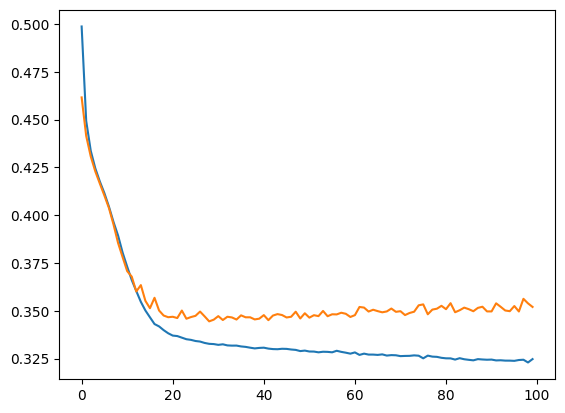

In [45]:
# Plot the training and validation loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

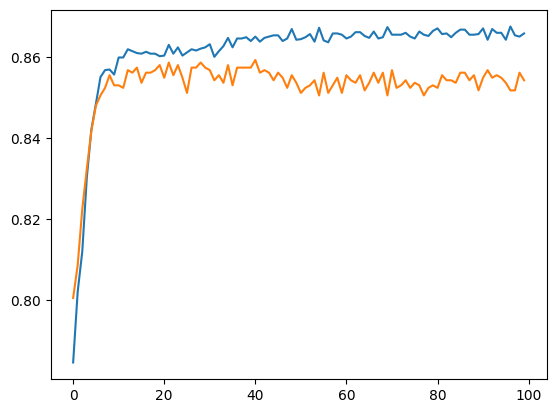

In [ ]:
# Plot the training and validation accuracy

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])